In [14]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import wooldridge
from typing import *
from statsmodels.tools.eval_measures import rmse
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
number_of_items: List[int] = [4,6,6,8,8,8,9,9,10,12] 
total_spending: List[int] = [9,10,18,20,15,17,20,22,25,30]
df = pd.DataFrame({"total spending": total_spending, "number of items": number_of_items})

df.head()

,total spending,number of items
0,9,4
1,10,6
2,18,6
3,20,8
4,15,8


In [5]:
# lm stands for linear model
# Y ~ X
lm = smf.ols(formula="total_spending ~ number_of_items", data=df).fit()
print(lm.params)

lm.summary()

Intercept         -2.269565
number_of_items    2.608696
dtype: float64


C:\Users\brend\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_spending   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     45.24
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           0.000149
Time:                        13:27:28   Log-Likelihood:                -22.745
No. Observations:                  10   AIC:                             49.49
Df Residuals:                       8   BIC:                             50.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2696      3.212     -0.707      0.500      -9.677       5.138
number_of_items     2.6087      0.388      6.726      0.000       1.714       3.503
==============================================================================
Omnibus:                        0.113   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.118
Skew:                           0.104   Prob(JB):                        0.943
Kurtosis:                       2.512   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

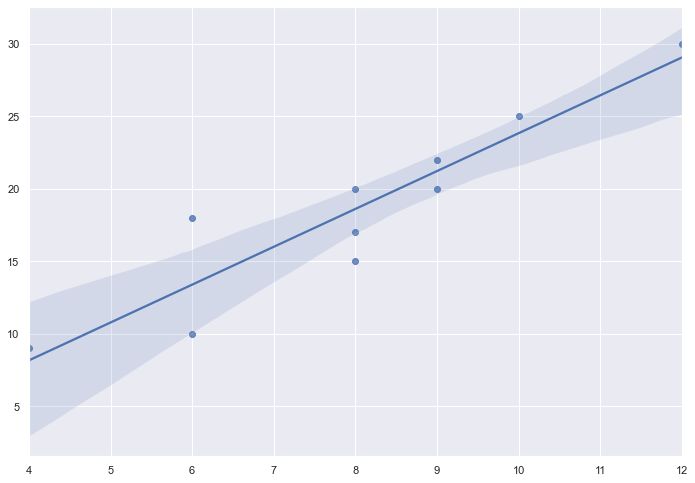

In [6]:
sns.regplot(x=number_of_items, y=total_spending, data=df)

In [31]:
df = wooldridge.data("CEOSAL1")
roe_df = df["roe"]
salary_df = df["salary"]
lm = smf.ols(formula="salary ~ roe", data=df).fit()

print(lm.params)
lm.summary()

Intercept    963.191336
roe           18.501186
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Wed, 09 Feb 2022   Prob (F-statistic):             0.0978
Time:                        13:41:46   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='roe', ylabel='salary'>

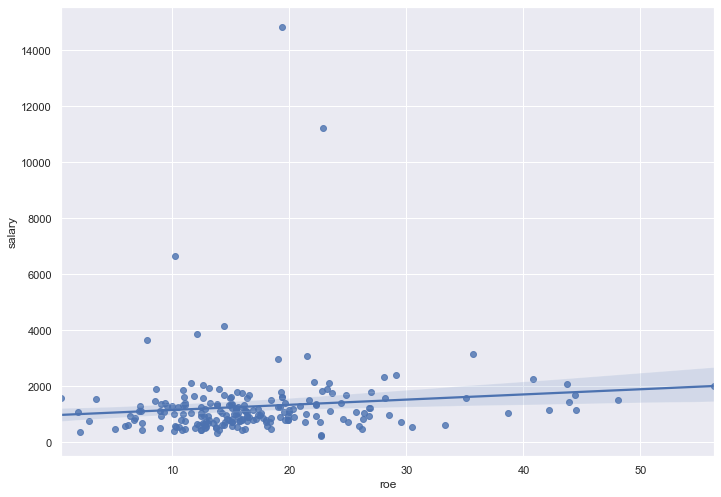

In [24]:
sns.regplot(x=roe_df, y=salary_df, data=df)

<AxesSubplot:xlabel='roe', ylabel='salary'>

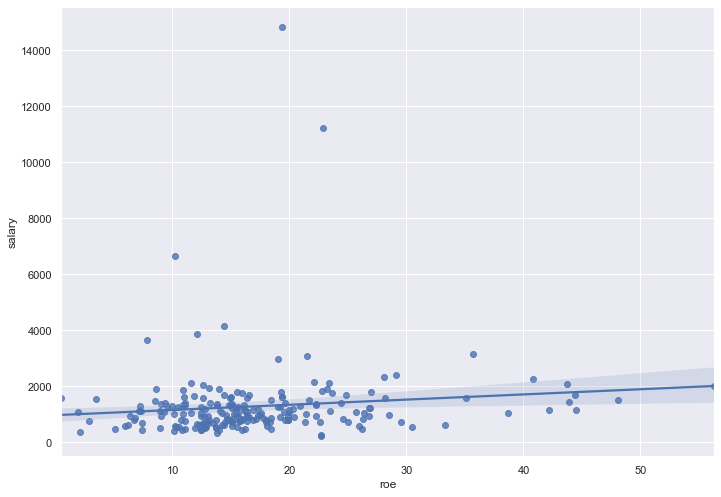

In [46]:
# remove all points from the dataframe df where "salary" is more than 14000
df = df[df["salary"] < 14000]
sns.regplot(x=roe_df, y=salary_df, data=df)